In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv("auto-mpg.csv")

In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [33]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [35]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [36]:
print(df.nunique())

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64


In [37]:
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [38]:
df.isnull().sum() 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [39]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [40]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [41]:
df = df[df.horsepower != '?']

In [42]:
print('?' in df.horsepower)

False


In [43]:
df.horsepower = df.horsepower.astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [44]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [45]:
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

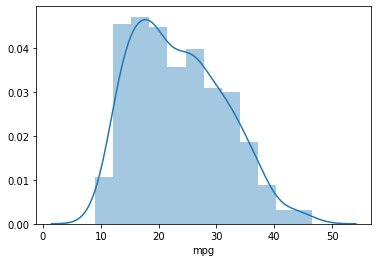

In [46]:
sns.distplot(df['mpg'])


In [47]:
df['car name']=df['car name'].str.split('\t').str[1]

In [48]:
df.drop('car name',inplace=True,axis=1)

In [49]:
for column in df.columns:
    if(column !='car name' and column !='model_year' and column!='origin'):
        df[column]=pd.to_numeric(df[column])


In [50]:
df.dropna(axis=0,inplace=True)

In [51]:
df.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1

In [52]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


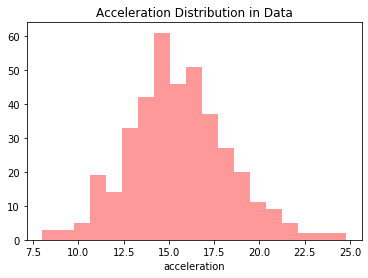

In [53]:
sns.distplot(df['acceleration'], hist=True, kde=False, color='red')
plt.title('Acceleration Distribution in Data')
plt.show()

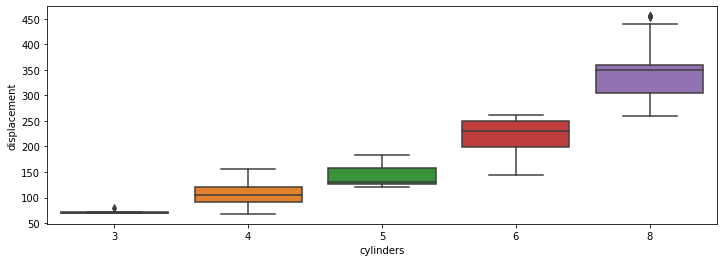

In [55]:
plt.figure(figsize=(12,4))
sns.boxplot(x='cylinders',y='displacement', data=df)
plt.show()

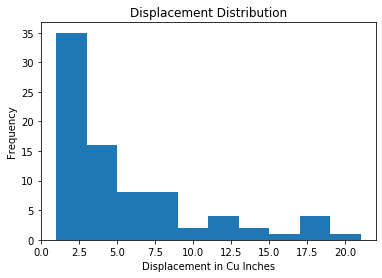

In [56]:
df['displacement'].value_counts().plot(kind='hist');
plt.xlabel('Displacement in Cu Inches')
plt.title('Displacement Distribution')
plt.show()

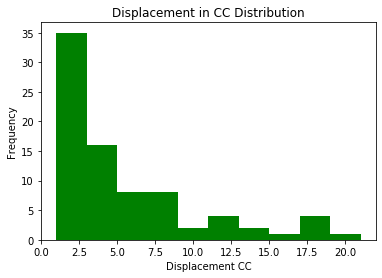

In [58]:
df['displacement'].value_counts().plot(kind='hist', color='Green')
plt.xlabel('Displacement CC')
plt.title('Displacement in CC Distribution')
plt.show()

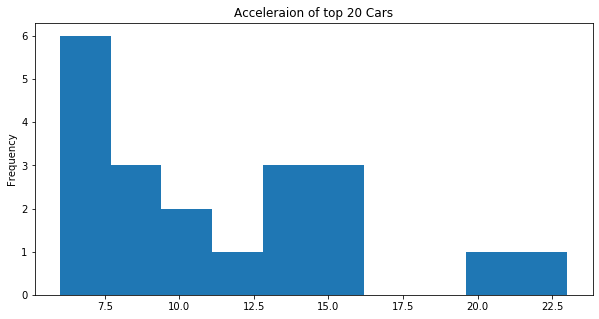

In [59]:
plt.figure(figsize=(10,5))
df['acceleration'].value_counts().head(20).plot(kind='hist', title='Acceleraion of top 20 Cars');

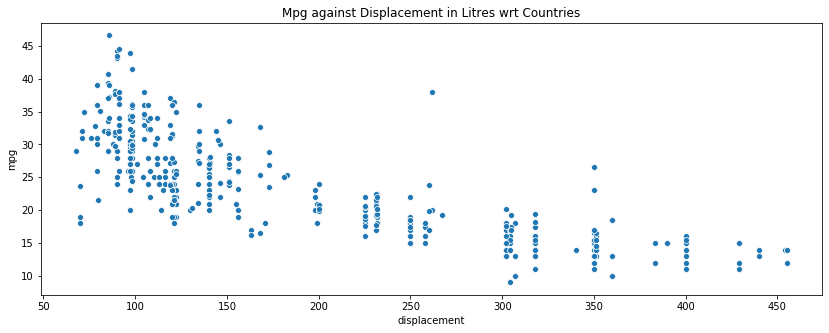

In [61]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='displacement', y='mpg', data=df)
plt.title('Mpg against Displacement in Litres wrt Countries')
plt.show()

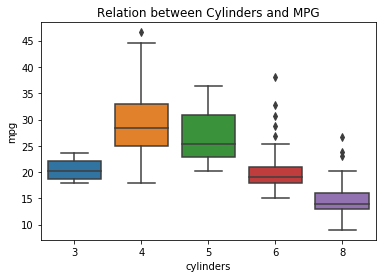

In [62]:
sns.boxplot(x='cylinders',y='mpg',data=df);
plt.title('Relation between Cylinders and MPG')
plt.show()

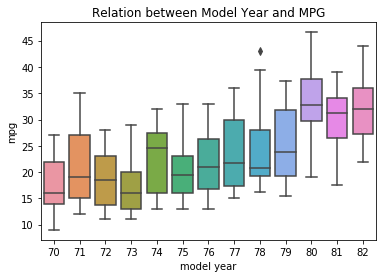

In [63]:
sns.boxplot(x='model year',y='mpg',data=df);
plt.title('Relation between Model Year and MPG')
plt.show()

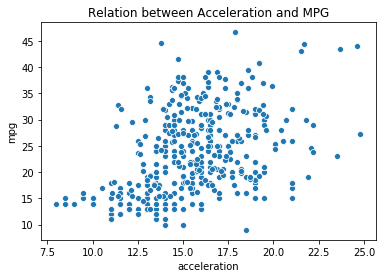

In [64]:
sns.scatterplot(x='acceleration', y='mpg', data=df);
plt.title('Relation between Acceleration and MPG')
plt.show()

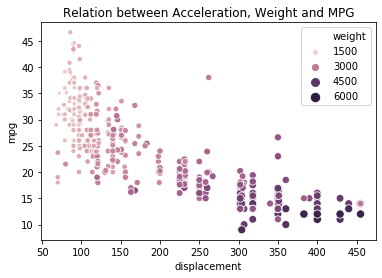

In [65]:
sns.scatterplot(x='displacement', y='mpg',size='weight', hue='weight', data=df)
plt.title('Relation between Acceleration, Weight and MPG')
plt.show()

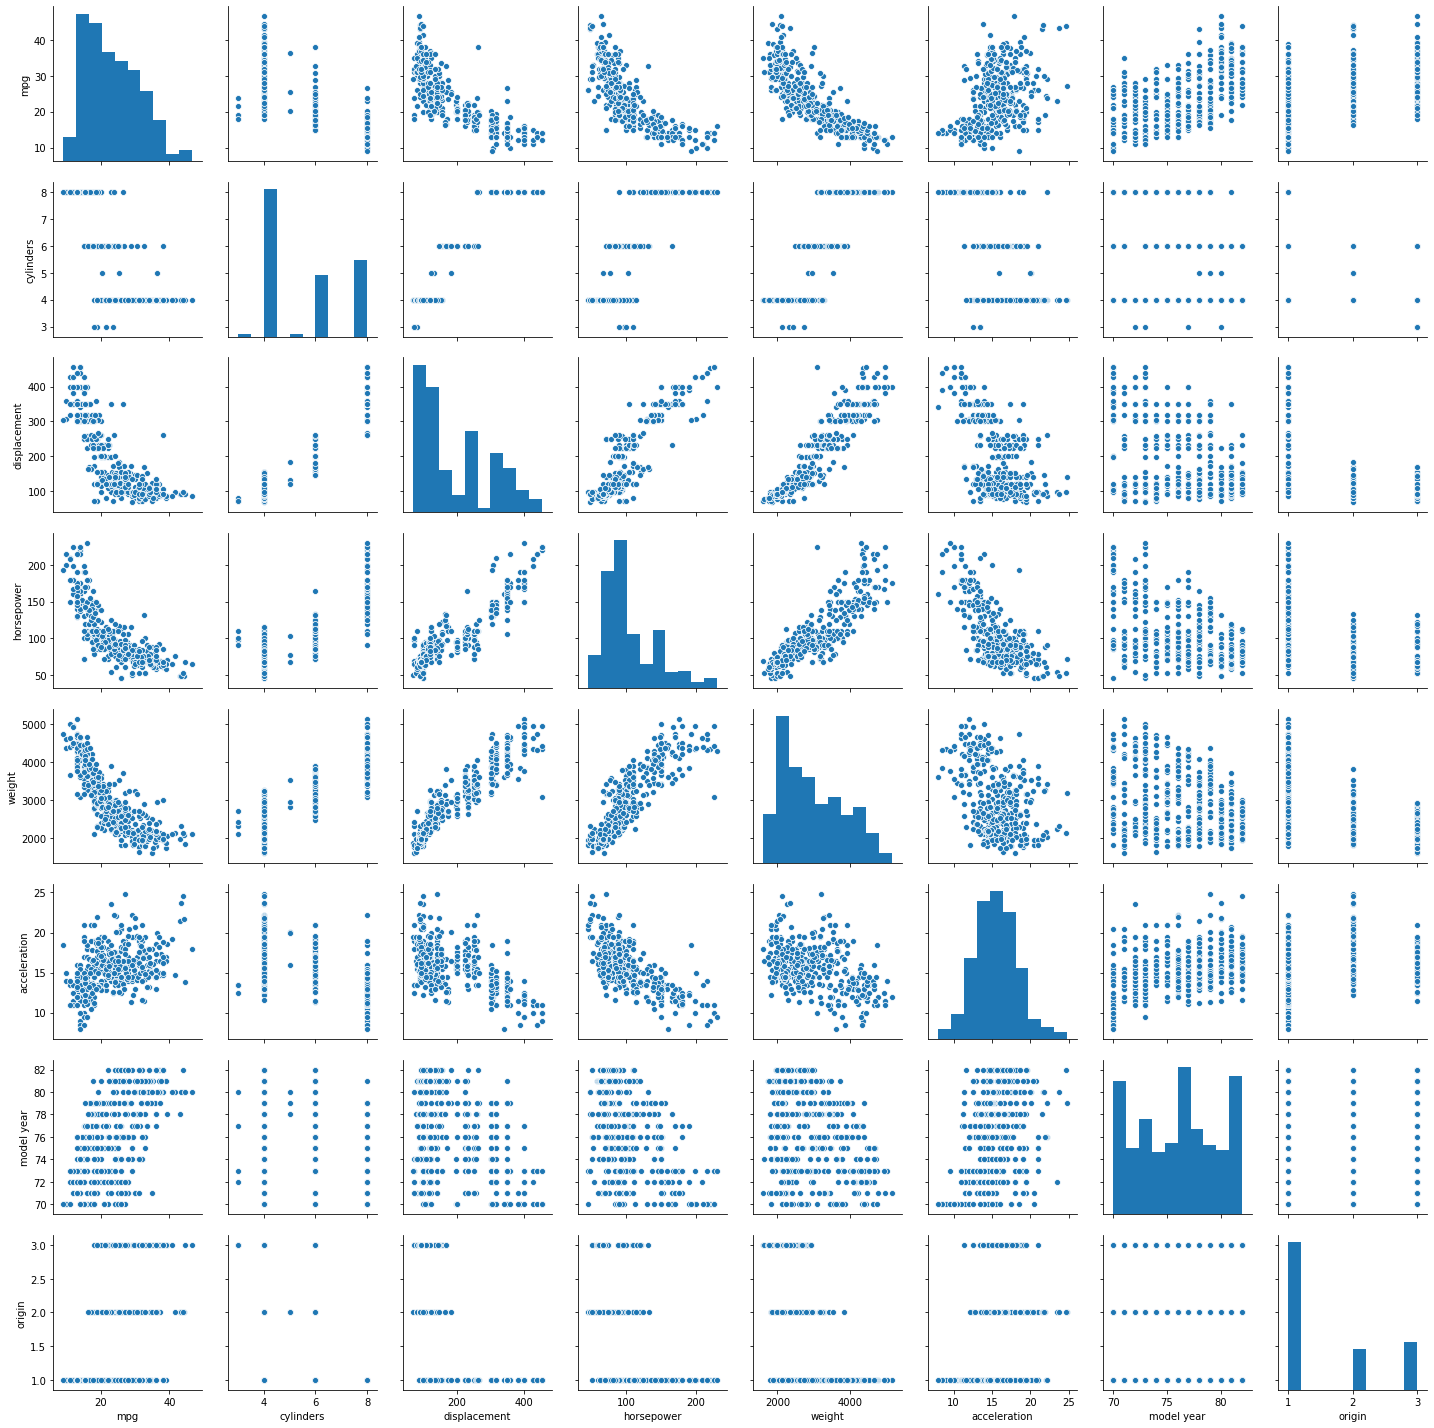

In [66]:
sns.pairplot(df)
plt.show()

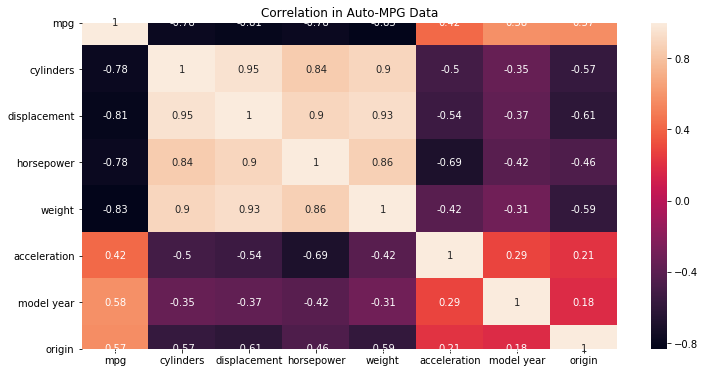

In [67]:
cor = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, annot=True)
plt.title('Correlation in Auto-MPG Data')
plt.show()

In [68]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df_final=df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(392, 8)
(385, 8)


In [69]:
df_final.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.774643,-0.807068,-0.787812,-0.833590,0.395288,0.568161,0.562748
cylinders,-0.774643,1.000000,0.954300,0.849691,0.898992,-0.486261,-0.325974,-0.564313
displacement,-0.807068,0.954300,1.000000,0.890674,0.939709,-0.517863,-0.343222,-0.617161
horsepower,-0.787812,0.849691,0.890674,1.000000,0.878480,-0.669937,-0.389594,-0.456519
weight,-0.833590,0.898992,0.939709,0.878480,1.000000,-0.402898,-0.293136,-0.583706
acceleration,0.395288,-0.486261,-0.517863,-0.669937,-0.402898,1.000000,0.253311,0.197010
model year,0.568161,-0.325974,-0.343222,-0.389594,-0.293136,0.253311,1.000000,0.169711
origin,0.562748,-0.564313,-0.617161,-0.456519,-0.583706,0.197010,0.169711,1.000000


In [70]:
df_final.skew()

mpg             0.432109
cylinders       0.533598
displacement    0.672639
horsepower      0.971972
weight          0.531125
acceleration    0.227886
model year      0.012683
origin          0.902325
dtype: float64

In [71]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])
df_final.skew()

mpg             0.432109
cylinders       0.533598
displacement    0.209618
horsepower      0.318632
weight          0.531125
acceleration    0.227886
model year      0.012683
origin          0.779969
dtype: float64

In [72]:
x=df_final.drop(columns=["mpg"])
y=df_final[["mpg"]]

In [73]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [75]:
x_train.shape


(308, 7)

In [76]:
x_test.shape

(77, 7)

In [77]:
y_train.shape

(308, 1)

In [79]:
y_test.shape

(77, 1)

In [82]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
max_r_score=0
for r_state in range(60,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is: ",max_r_score)

max r2 score corresponding to  79  is:  0.882317208395052


In [89]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=10,scoring="r2").mean()

0.6484479967329683

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [92]:
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.882317208395052
RMSE is :  2.5957879170159015


In [93]:
from sklearn.externals import joblib
joblib.dump(lr, "lr_autompg.pk1")

['lr_autompg.pk1']